In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import time
import random
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from iso639 import languages
import user_agents
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo
import requests
import json
from geopy.distance import great_circle
from geopy.geocoders import Nominatim
from datasist.structdata import detect_outliers
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder 
from datetime import datetime
from sklearn.model_selection import train_test_split , cross_validate
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler 
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import r2_score , mean_squared_error , classification_report ,recall_score , precision_score , ConfusionMatrixDisplay , confusion_matrix
from sklearn.linear_model import Ridge , Lasso
from sklearn.tree import DecisionTreeRegressor , DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor , RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB , GaussianNB , BernoulliNB
from sklearn.svm import SVC , SVR
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier
import xgboost as xgb
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn.decomposition import PCA
%matplotlib inline


In [2]:
#import data
#project 1
raw_data=pd.read_csv('../data/interim/breast_cancer.csv')
df=raw_data.copy()
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
367,12.21,18.02,78.31,458.4,0.09231,0.07175,0.043920,0.02027,0.1695,0.05916,...,24.04,93.85,624.6,0.1368,0.2170,0.24130,0.08829,0.3218,0.07470,1
420,11.57,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.01428,0.2031,0.06267,...,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284,1
373,20.64,17.35,134.80,1335.0,0.09446,0.10760,0.152700,0.08941,0.1571,0.05478,...,23.17,166.80,1946.0,0.1562,0.3055,0.41590,0.21120,0.2689,0.07055,0
13,15.85,23.95,103.70,782.7,0.08401,0.10020,0.099380,0.05364,0.1847,0.05338,...,27.66,112.00,876.5,0.1131,0.1924,0.23220,0.11190,0.2809,0.06287,0
419,11.16,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.01076,0.1615,0.06144,...,28.92,79.26,458.0,0.1282,0.1108,0.03582,0.04306,0.2976,0.07123,1


In [3]:
#cleansing
#investing
df.shape

(569, 31)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [5]:
#no object features exist
#df.describe(include='O').T

In [6]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [7]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
#check duplicates
df.duplicated().sum()

0

In [10]:
#check missing value
#there is no missing value
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64

In [11]:
#check columns
#rename columns
df.columns=df.columns.str.lower().str.strip().str.replace(" ","_")
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'target'],
      dtype='object')

In [12]:
#check rows 
#check unique id and logic
#check object
#no object features exist
for i in  df.select_dtypes('object'):
    print(f'for {i} : \n',df[i].value_counts())
    print('-'*60)

In [13]:
#feature engineering
#there is no domain knowledge feature,string operation,data and time feature ,web users nor geospatial feature

In [14]:
#detec and handle outliers
#there is no outliers to be handled

<AxesSubplot:>

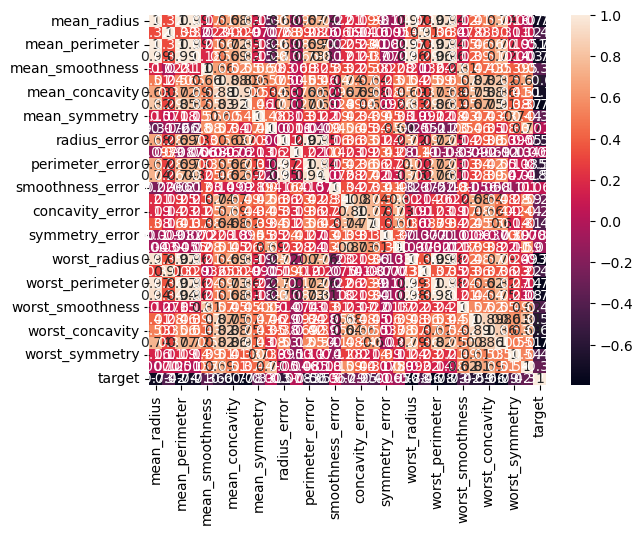

In [15]:
#correlation
sns.heatmap(df.select_dtypes('number').corr(), annot=True )

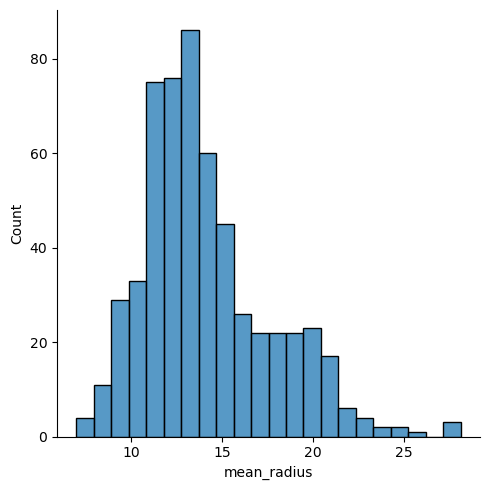

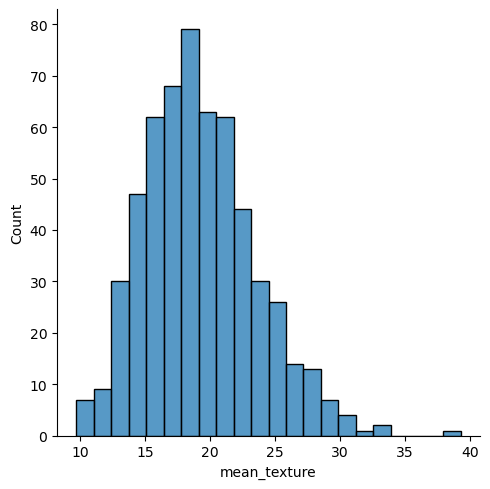

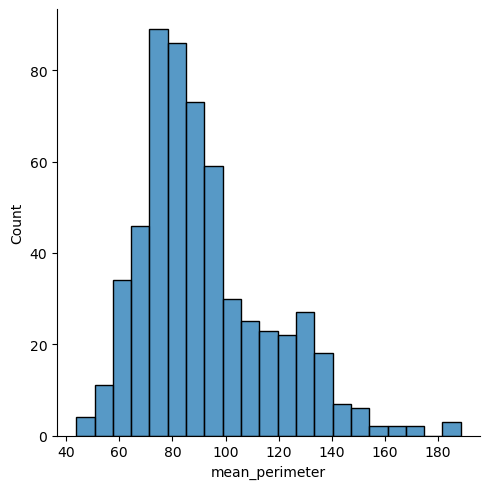

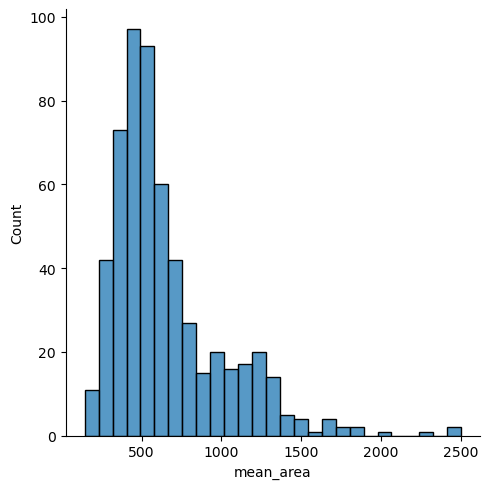

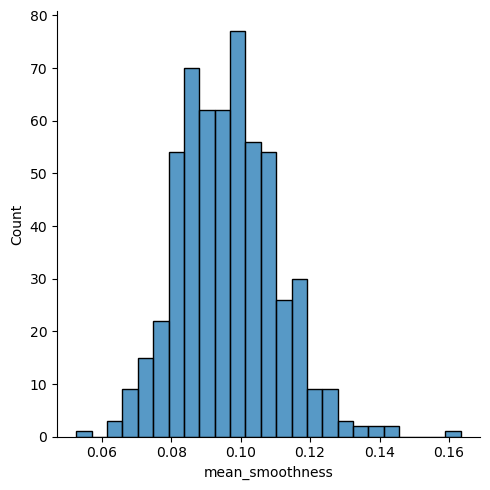

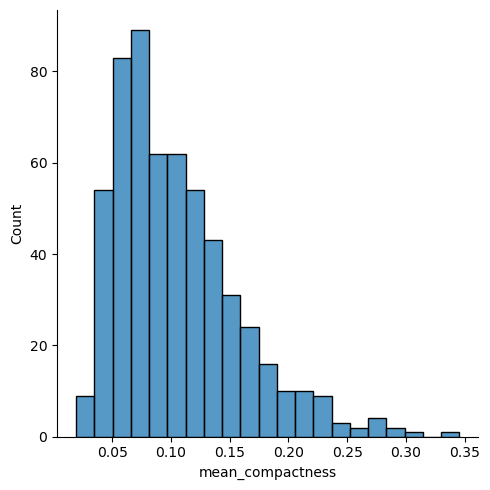

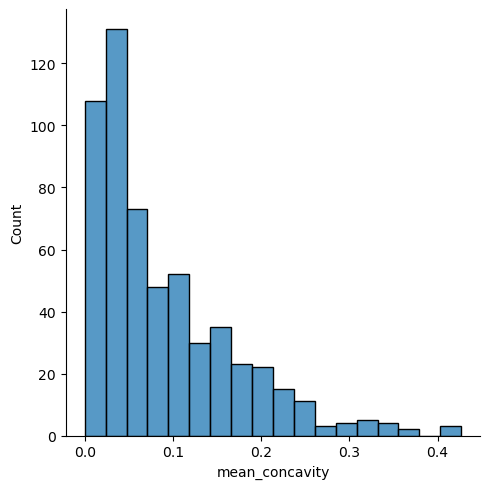

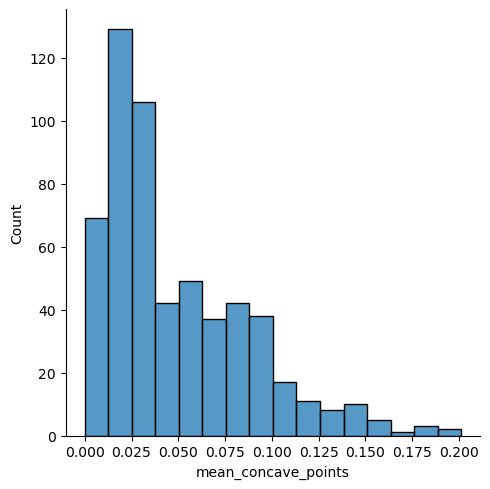

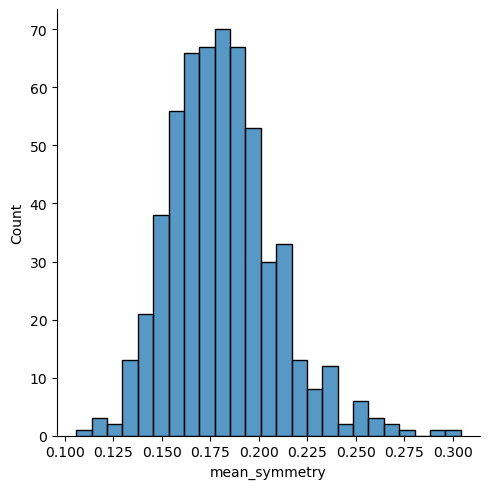

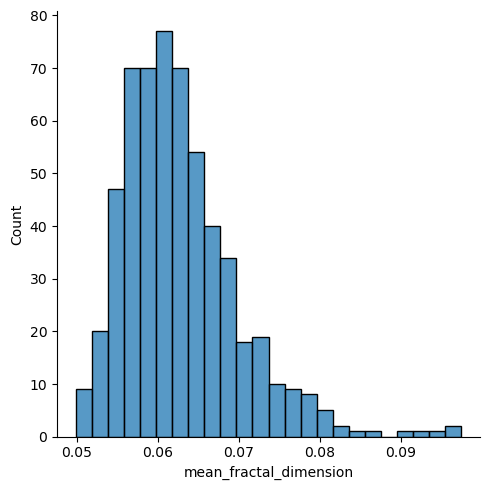

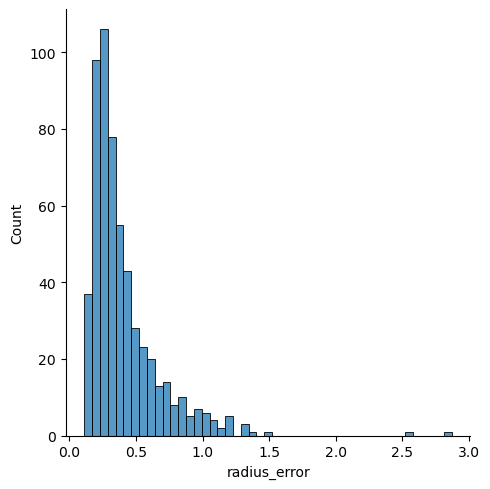

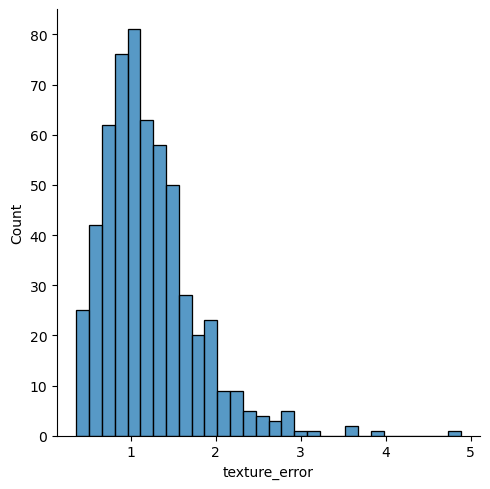

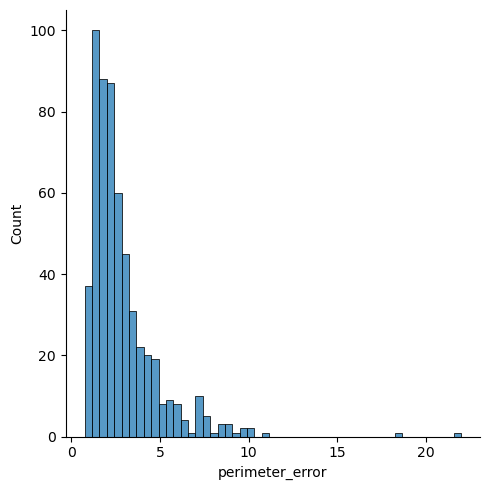

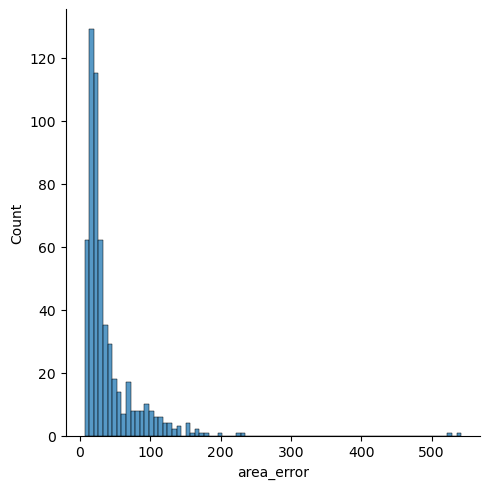

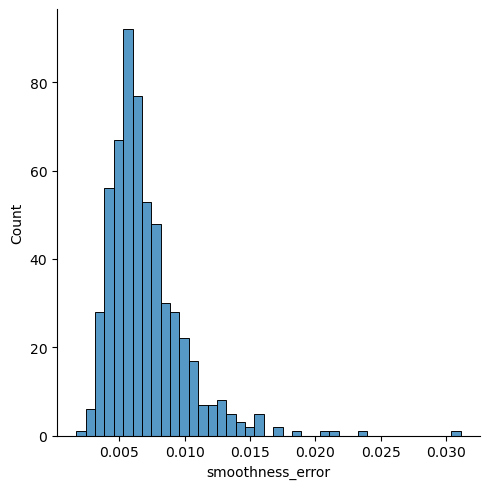

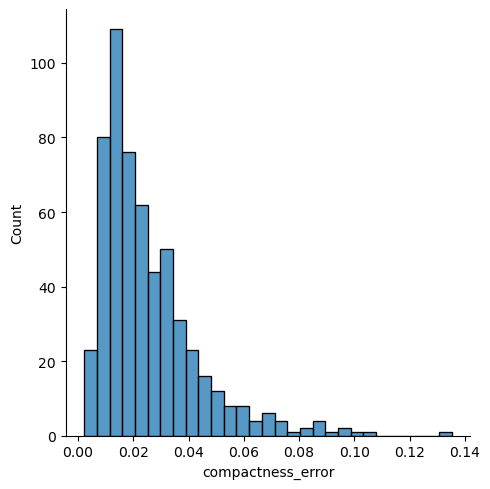

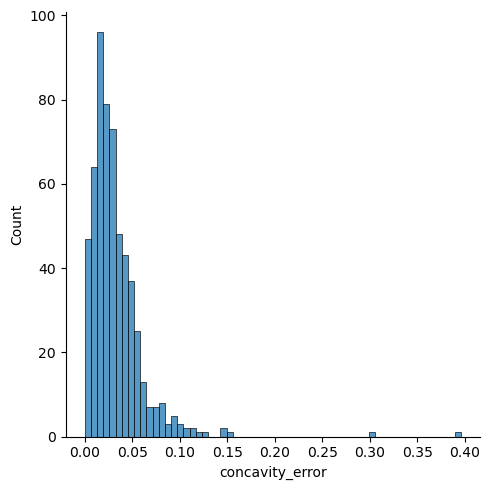

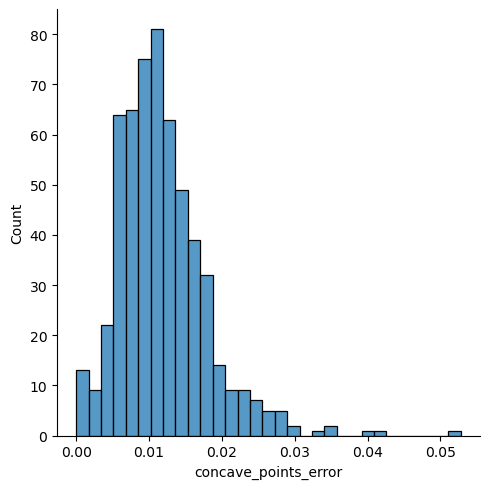

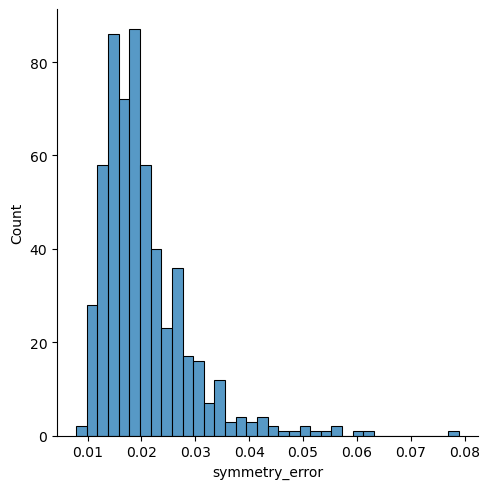

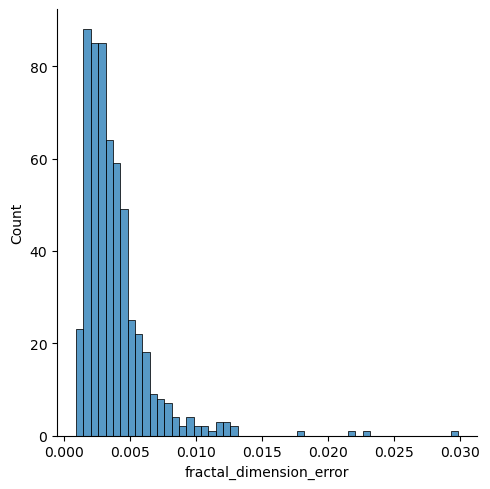

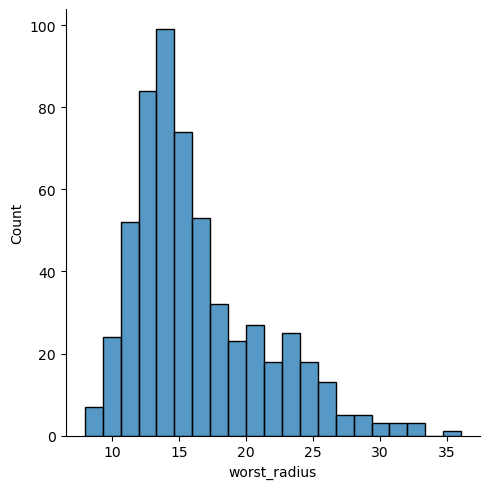

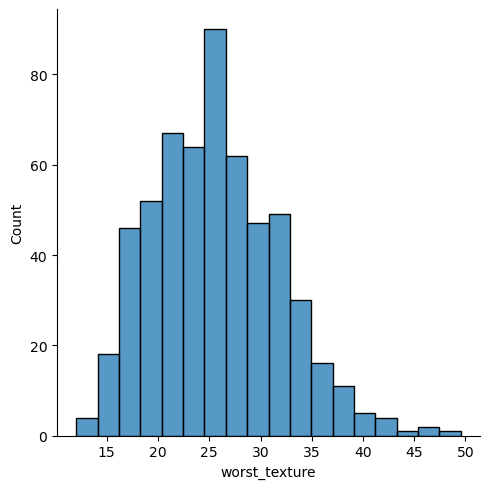

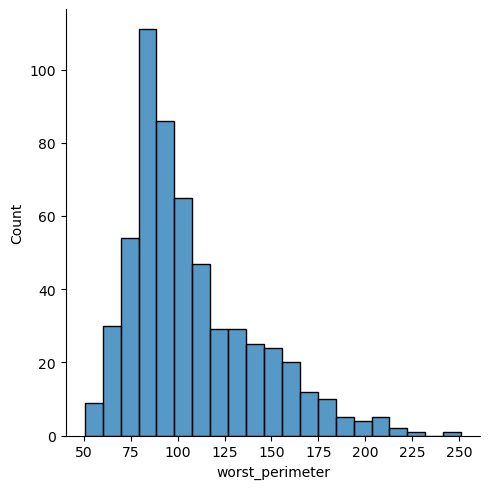

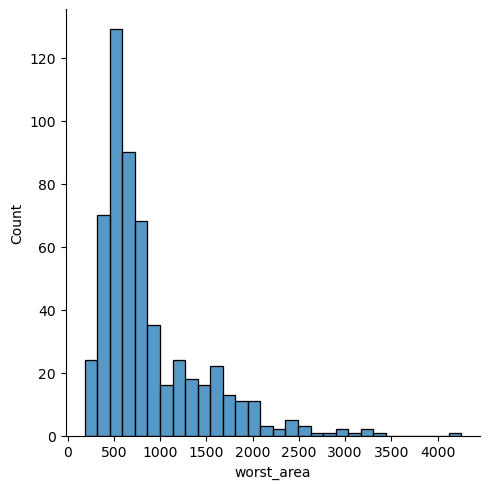

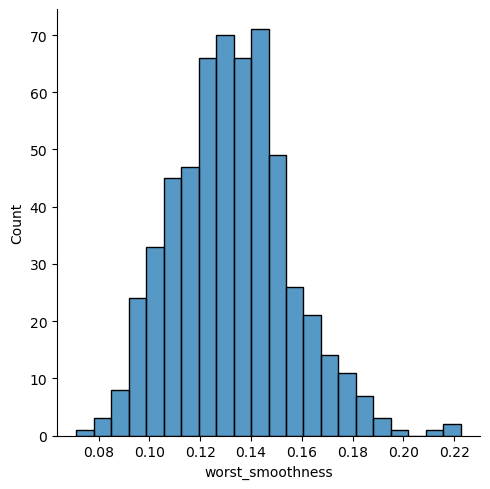

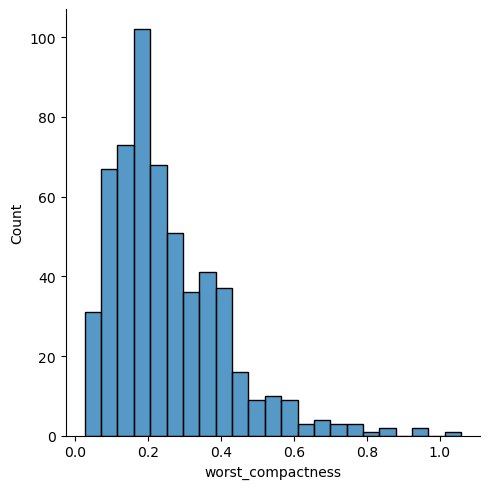

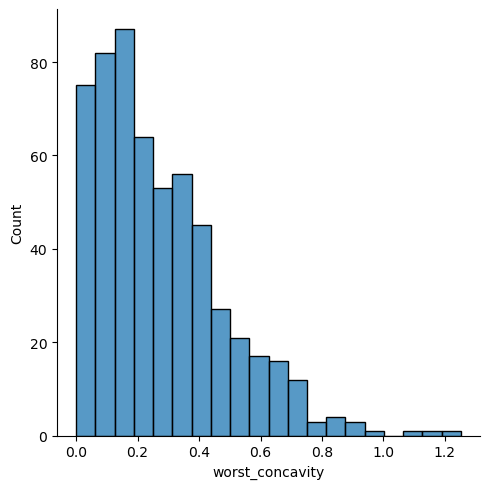

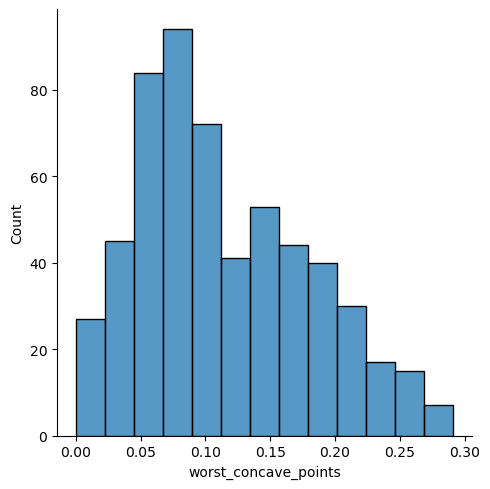

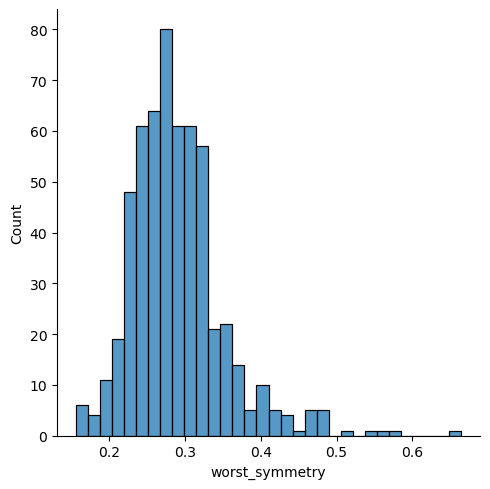

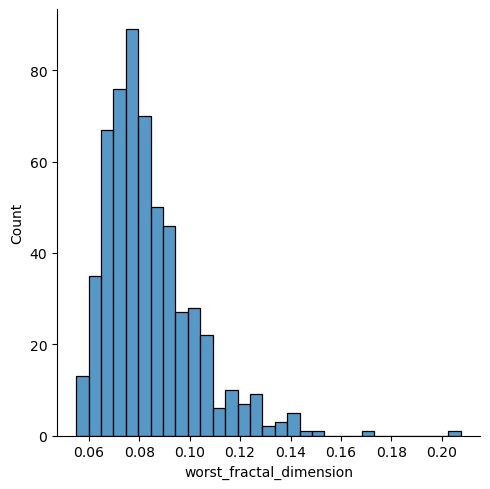

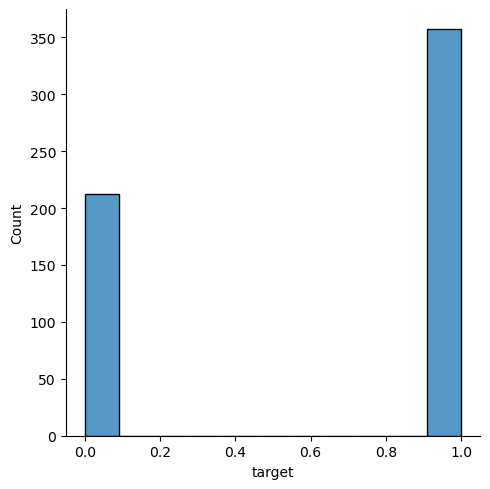

In [16]:
#univariate analysis
for i in df.columns:
    sns.displot(x=df[i])

In [17]:
#most of features has gaussian distribution
#the best models to use --> Logistic Regression , GNB , SVC with RBF
#no encoding because there is no object features

In [18]:
#split data without PCA
#we wonot have x_train and x_test , y_train and y_test because we will apply it on CV
x=df.drop('target',axis=1)
y=df['target']

In [19]:
x

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [20]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

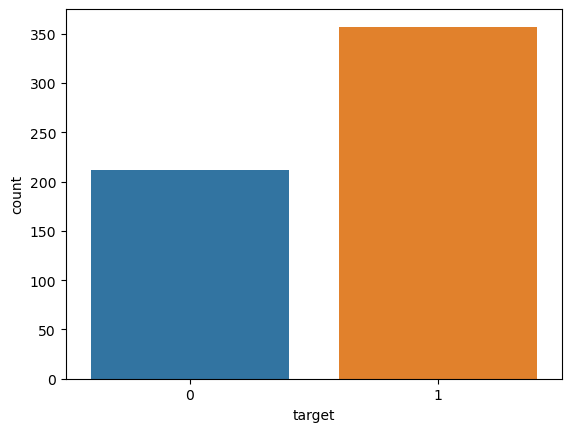

In [21]:
#check imbalancing class
sns.countplot(x=y)

In [22]:
#the target is balanced

In [23]:
#leave paramters of models by default
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
Models = [
    ('LR',LogisticRegression()),
    ('GNB',GaussianNB()),
    ('SVC' , SVC(kernel='rbf')),
    ('DT' , DecisionTreeClassifier()),
    ('RF' , RandomForestClassifier())
]

In [25]:
#create pipeline for scaling then  your preferred model
#create stander scaler object
pipline_lst=[]
for model in Models :
    pipline=make_pipeline(StandardScaler(),model[1])
    pipline_lst.append((model[0],pipline[1]))
    #use cv
    scores=cross_validate(estimator=pipline,X=x,y=y,cv=5,return_train_score=True)
    #train scores of cv
    print(f'for model {model[0]} , train scores are : ',scores['train_score'])
    print()
    print('test scores are : ',scores['test_score'])
    print()
    print('fit time is : ',scores['fit_time'])
    print('-'*30)

for model LR , train scores are :  [0.99120879 0.98901099 0.98901099 0.99120879 0.98684211]

test scores are :  [0.98245614 0.98245614 0.97368421 0.97368421 0.99115044]

fit time is :  [0.07540989 0.06016493 0.01609969 0.03000045 0.01500082]
------------------------------
for model GNB , train scores are :  [0.93626374 0.94945055 0.93626374 0.93846154 0.94078947]

test scores are :  [0.90350877 0.9122807  0.95614035 0.94736842 0.92035398]

fit time is :  [0.01499963 0.00829434 0.01599765 0.         0.01492405]
------------------------------
for model SVC , train scores are :  [0.98681319 0.98901099 0.98461538 0.98901099 0.98684211]

test scores are :  [0.97368421 0.95614035 1.         0.96491228 0.97345133]

fit time is :  [0.01500058 0.01500988 0.03407645 0.00812626 0.01499748]
------------------------------
for model DT , train scores are :  [1. 1. 1. 1. 1.]

test scores are :  [0.9122807  0.92982456 0.92982456 0.94736842 0.89380531]

fit time is :  [0.03000021 0.03000045 0.01500034 

In [26]:
import pickle
for i in pipline_lst :
    if i[0] == 'DT':
        pickle.dump(i[1], open('model_first_1.pkl', 'wb'))

In [27]:
#create pipeline for scaling then 10 PCA then your preferred model
#create stander scaler object
pipline_lst=[]
for model in Models :
    pipline=make_pipeline(StandardScaler(),PCA(n_components=10),model[1])
    pipline_lst.append((model[0],pipline[2]))
    #use cv
    scores=cross_validate(estimator=pipline,X=x,y=y,cv=5,return_train_score=True)
    #train scores of cv
    print(f'for model {model[0]} , train scores are : ',scores['train_score'])
    print()
    print('test scores are : ',scores['test_score'])
    print()
    print('fit time is : ',scores['fit_time'])
    print('-'*30)

for model LR , train scores are :  [0.98681319 0.98901099 0.98681319 0.98901099 0.98684211]

test scores are :  [0.99122807 0.97368421 0.98245614 0.97368421 0.98230088]

fit time is :  [0.07546759 0.02322364 0.03000546 0.0299933  0.01507592]
------------------------------
for model GNB , train scores are :  [0.90769231 0.91868132 0.93186813 0.92527473 0.91447368]

test scores are :  [0.89473684 0.92105263 0.92105263 0.93859649 0.92035398]

fit time is :  [0.01499915 0.01500106 0.01508713 0.01499891 0.        ]
------------------------------
for model SVC , train scores are :  [0.98461538 0.98681319 0.98461538 0.98681319 0.98464912]

test scores are :  [0.97368421 0.96491228 0.99122807 0.97368421 0.98230088]

fit time is :  [0.02999949 0.01500368 0.02503991 0.0150888  0.01500487]
------------------------------
for model DT , train scores are :  [1. 1. 1. 1. 1.]

test scores are :  [0.88596491 0.93859649 0.92105263 0.96491228 0.88495575]

fit time is :  [0.01500201 0.01499891 0.01501846 

In [28]:
import pickle
for i in pipline_lst :
    if i[0] == 'DT':
        pickle.dump(i[1], open('model_first_1.pkl', 'wb'))

In [30]:
#create pipeline for scaling then 2 PCA then your preferred model
#create stander scaler object
pipline_lst=[]
for model in Models :
    pipline=make_pipeline(StandardScaler(),PCA(n_components=2),model[1])
    pipline_lst.append((model[0],pipline[2]))
    #use cv
    scores=cross_validate(estimator=pipline,X=x,y=y,cv=5,return_train_score=True)
    #train scores of cv
    print(f'for model {model[0]} , train scores are : ',scores['train_score'])
    print()
    print('test scores are : ',scores['test_score'])
    print()
    print('fit time is : ',scores['fit_time'])
    print('-'*30)

for model LR , train scores are :  [0.95604396 0.94945055 0.95604396 0.95604396 0.95394737]

test scores are :  [0.93859649 0.94736842 0.93859649 0.94736842 0.98230088]

fit time is :  [0.0339694  0.03847575 0.02450657 0.0150075  0.0159986 ]
------------------------------
for model GNB , train scores are :  [0.92307692 0.91648352 0.90989011 0.91208791 0.91447368]

test scores are :  [0.85964912 0.9122807  0.94736842 0.92982456 0.92035398]

fit time is :  [0.01709986 0.01501274 0.01499987 0.01500368 0.01499677]
------------------------------
for model SVC , train scores are :  [0.94065934 0.94285714 0.93846154 0.94285714 0.95175439]

test scores are :  [0.9122807  0.92105263 0.96491228 0.94736842 0.95575221]

fit time is :  [0.01499677 0.03000021 0.02940416 0.0189805  0.01501513]
------------------------------
for model DT , train scores are :  [1. 1. 1. 1. 1.]

test scores are :  [0.88596491 0.93859649 0.92982456 0.92105263 0.94690265]

fit time is :  [0.01499677 0.01501298 0.01500273 

In [31]:
import pickle
for i in pipline_lst :
    if i[0] == 'SVC':
        pickle.dump(i[1], open('model_first_1.pkl', 'wb'))

In [32]:
#the first try without PCA generate the best model

In [33]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/ca/48/643d21747d52fa380f572f76c493779fc5b4bd03605247209d2dd0a6d9a9/keras-3.0.2-py3-none-any.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
     ------------------------------------ 101.5/101.5 kB 729.8 kB/s eta 0:00:00
   ---------------------------------------- 1.0/1.0 MB 861.5 kB/s eta 0:00:00
   -------------------------------------- 130.2/130.2 kB 701.5 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
!pip install tensorflow==1.2.0 --ignore-installed

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement tensorflow==1.2.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0)
ERROR: No matching distribution found for tensorflow==1.2.0

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
#read Cifar data
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [44]:
#return path name to unpickle function
file='../data/interim/data_batch_1'
df=unpickle(file)

In [47]:
#get keys of df
df.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [49]:
#access data by accessing data key
df[b'data']

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [58]:
#acess columns of data by accessign label key
df[b'filenames']

[b'leptodactylus_pentadactylus_s_000004.png',
 b'camion_s_000148.png',
 b'tipper_truck_s_001250.png',
 b'american_elk_s_001521.png',
 b'station_wagon_s_000293.png',
 b'coupe_s_001735.png',
 b'cassowary_s_001300.png',
 b'cow_pony_s_001168.png',
 b'sea_boat_s_001584.png',
 b'tabby_s_001355.png',
 b'muntjac_s_001000.png',
 b'arabian_s_001354.png',
 b'quarter_horse_s_000672.png',
 b'passerine_s_000343.png',
 b'camion_s_001895.png',
 b'trailer_truck_s_000335.png',
 b'dumper_s_000821.png',
 b'alley_cat_s_000200.png',
 b'accentor_s_000677.png',
 b'frog_s_001671.png',
 b'capreolus_capreolus_s_000051.png',
 b'tomcat_s_000772.png',
 b'pickerel_frog_s_000446.png',
 b'bufo_s_001242.png',
 b'cassowary_s_001246.png',
 b'toad_s_001748.png',
 b'cat_s_000081.png',
 b'chihuahua_s_000825.png',
 b'alces_alces_s_000959.png',
 b'stealth_bomber_s_000554.png',
 b'twinjet_s_000663.png',
 b'trucking_rig_s_001402.png',
 b'auto_s_000609.png',
 b'tabby_cat_s_000983.png',
 b'wapiti_s_000416.png',
 b'monoplane_s_000

In [52]:
df[b'data'][0]

array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8)